## Time constants analysis for all the datasets up to date

All the datasets have been processed by the function tc_compute_squaremod() in time_constants_tools.py (see nahuelmg-dev branch, make a pull request to merge this with the master branch). The output of this function is a dictionary with all the relevant information for the time constants and a plot of the folded data and its fit for the whole focal plane. This plot enables us to understand visually what kind of dataset we have.

### TODO:
1) write down a code to detect bad datasets from scratch and then delete them from the list.

2) write down a code to detect de-synchronization between ASIC (see latest datasets from 2023). Observe the ok_residuals_combined is all False for one ASIC.

In [1]:
import os
import glob
import gc
from numpy import *
import numpy as np
from importlib import reload

from matplotlib.pyplot import *
from matplotlib import pyplot as plt
from IPython.display import display, HTML
display(HTML("<style>.container { width:97% !important; }</style>"))

%matplotlib inline
rc('figure',figsize=(11,6))
rc('font',size=12)

# from qubicpack.qubicfp import qubicfp
# from qubic import time_domain_tools as tdt
# from qubic import time_constants_tools as tct

### Save path

Define the path where all the dictionaries are stored and then construct a list with those dictionaries

In [15]:
# save_path = '/media/nahue/files_hdd/heavy-data/time_constants_results/all_TC_datasets_up_to_may_2023_3/'
save_path = '/home/nahue-ofi/Nextcloud/time-constants/time_constants_results/all_TC_datasets_up_to_may_2023_3/'
# save_path = '/media/nahue/files_hdd/heavy-data/all_TC_datasets_up_to_may_2023/'
# save_path = '/home/nahue/Downloads/2023-04-17/results/'
thedicts = np.sort(glob.glob(save_path+'d__*'))

# print('All the available dictionaries to analyze')
# for i in range(len(thedicts)):
#     print(i, thedicts[i])

### Remove bad datasets
For now by eye

In [16]:
dicts_to_delete = np.array([ '/media/nahue/files_hdd/heavy-data/alldatasets_to_may_2023/d__2019-11-14_16.01.24__TimeCstScript_nu_150_fmod_0.6_amp_0.5_off_1.0_dc_33.333_sh_SQU_Vtes_1.2.npy',
'/media/nahue/files_hdd/heavy-data/all_TC_datasets_up_to_may_2023/d__2019-11-14_16.11.29__TimeCstScript_nu_150_fmod_0.6_amp_0.5_off_1.0_dc_33.333_sh_SQU_Vtes_1.1.npy',
'/media/nahue/files_hdd/heavy-data/all_TC_datasets_up_to_may_2023/d__2019-11-14_16.21.33__TimeCstScript_nu_150_fmod_0.6_amp_0.5_off_1.0_dc_33.333_sh_SQU_Vtes_1.npy',
'/media/nahue/files_hdd/heavy-data/all_TC_datasets_up_to_may_2023/d__2019-11-14_16.31.38__TimeCstScript_nu_150_fmod_0.6_amp_0.5_off_1.0_dc_33.333_sh_SQU_Vtes_0.8999999999999999.npy',
'/media/nahue/files_hdd/heavy-data/all_TC_datasets_up_to_may_2023/d__2019-11-14_16.41.42__TimeCstScript_nu_150_fmod_0.6_amp_0.5_off_1.0_dc_33.333_sh_SQU_Vtes_0.8000000000000003.npy',
'/media/nahue/files_hdd/heavy-data/all_TC_datasets_up_to_may_2023/d__2019-11-14_16.51.46__TimeCstScript_nu_150_fmod_0.6_amp_0.5_off_1.0_dc_33.333_sh_SQU_Vtes_0.7000000000000002.npy',
'/media/nahue/files_hdd/heavy-data/all_TC_datasets_up_to_may_2023/d__2020-11-12_09.16.10__carbonfibre_1.2Hz_duty33_amplitude_offset.npy',
'/media/nahue/files_hdd/heavy-data/all_TC_datasets_up_to_may_2023/d__2020-11-12_10.19.54__carbonfibre_0.8Hz_duty33_low0V_high1V.npy',
'/media/nahue/files_hdd/heavy-data/all_TC_datasets_up_to_may_2023/d__2022-04-06_13.45.08__NoiseMeasurement_FileDuration_CalSourceON180_Vtes_2.5.npy',
'/media/nahue/files_hdd/heavy-data/all_TC_datasets_up_to_may_2023/d__2022-04-06_13.48.14__NoiseMeasurement_FileDuration_CalSourceON180_Vtes_2.npy',
'/media/nahue/files_hdd/heavy-data/all_TC_datasets_up_to_may_2023/d__2022-04-06_18.21.20__NoiseMeasurement_FileDuration_CalSourceON180_Vtes_2.5.npy',
'/media/nahue/files_hdd/heavy-data/all_TC_datasets_up_to_may_2023/d__2022-04-06_18.24.27__NoiseMeasurement_FileDuration_CalSourceON180_Vtes_2.npy',
'/media/nahue/files_hdd/heavy-data/all_TC_datasets_up_to_may_2023/d__2022-08-18_15.13.42__timeconstant_TimePerPos15_az1.35_el41.07.npy',
'/media/nahue/files_hdd/heavy-data/all_TC_datasets_up_to_may_2023/d__2022-08-18_15.14.25__timeconstant_TimePerPos15_az0.25_el41.06.npy',
'/media/nahue/files_hdd/heavy-data/all_TC_datasets_up_to_may_2023/d__2022-08-18_15.15.09__timeconstant_TimePerPos15_az-1.33_el41.07.npy',
'/media/nahue/files_hdd/heavy-data/all_TC_datasets_up_to_may_2023/d__2022-08-18_15.15.53__timeconstant_TimePerPos15_az-2.99_el41.58.npy',
'/media/nahue/files_hdd/heavy-data/all_TC_datasets_up_to_may_2023/d__2022-08-18_15.16.36__timeconstant_TimePerPos15_az-1.51_el41.54.npy',
'/media/nahue/files_hdd/heavy-data/all_TC_datasets_up_to_may_2023/d__2022-08-18_15.17.20__timeconstant_TimePerPos15_az0.07_el41.53.npy',
'/media/nahue/files_hdd/heavy-data/all_TC_datasets_up_to_may_2023/d__2022-08-18_15.18.08__timeconstant_TimePerPos15_az1.01_el42.02.npy',
'/media/nahue/files_hdd/heavy-data/all_TC_datasets_up_to_may_2023/d__2022-08-18_15.18.52__timeconstant_TimePerPos15_az-0.64_el42.01.npy',
'/media/nahue/files_hdd/heavy-data/all_TC_datasets_up_to_may_2023/d__2022-08-18_15.19.36__timeconstant_TimePerPos15_az-2.19_el42.03.npy',
'/media/nahue/files_hdd/heavy-data/all_TC_datasets_up_to_may_2023/d__2022-08-18_15.20.19__timeconstant_TimePerPos15_az-3.63_el42.08.npy',
'/media/nahue/files_hdd/heavy-data/all_TC_datasets_up_to_may_2023/d__2022-08-18_15.21.01__timeconstant_TimePerPos15_az-4.25_el42.59.npy',
'/media/nahue/files_hdd/heavy-data/all_TC_datasets_up_to_may_2023/d__2022-08-18_15.21.46__timeconstant_TimePerPos15_az-2.85_el42.54.npy',
'/media/nahue/files_hdd/heavy-data/all_TC_datasets_up_to_may_2023/d__2022-08-18_15.22.32__timeconstant_TimePerPos15_az-1.33_el42.51.npy',
'/media/nahue/files_hdd/heavy-data/all_TC_datasets_up_to_may_2023/d__2022-08-18_15.23.18__timeconstant_TimePerPos15_az0.29_el42.51.npy',
'/media/nahue/files_hdd/heavy-data/all_TC_datasets_up_to_may_2023/d__2022-08-18_15.23.58__timeconstant_TimePerPos15_az0.15_el43.01.npy',
'/media/nahue/files_hdd/heavy-data/all_TC_datasets_up_to_may_2023/d__2022-08-18_15.24.46__timeconstant_TimePerPos15_az-1.48_el43.01.npy',
'/media/nahue/files_hdd/heavy-data/all_TC_datasets_up_to_may_2023/d__2022-08-18_15.25.30__timeconstant_TimePerPos15_az-3.00_el43.04.npy',
'/media/nahue/files_hdd/heavy-data/all_TC_datasets_up_to_may_2023/d__2022-08-18_15.26.14__timeconstant_TimePerPos15_az-4.40_el43.09.npy',
'/media/nahue/files_hdd/heavy-data/all_TC_datasets_up_to_may_2023/d__2023-03-02_16.40.52__calsource.npy',
'/media/nahue/files_hdd/heavy-data/all_TC_datasets_up_to_may_2023/d__2023-03-07_15.38.34__Fixed-DomeOpen-Amplitude1700-South.npy',
'/media/nahue/files_hdd/heavy-data/all_TC_datasets_up_to_may_2023/d__2023-03-07_16.21.17__Fixed-DomeOpen-Amplitude1700-South.npy',
'/media/nahue/files_hdd/heavy-data/all_TC_datasets_up_to_may_2023/d__2023-03-31_13.23.23__Dome-open-pointing-south-CF-0.6Hz-square-33duty.npy',
'/media/nahue/files_hdd/heavy-data/all_TC_datasets_up_to_may_2023/d__2023-03-31_13.42.01__Dome-open-pointing-south-CF-0.6Hz-square-66duty.npy',
'/media/nahue/files_hdd/heavy-data/all_TC_datasets_up_to_may_2023/d__2023-03-31_13.51.39__Dome-open-pointing-south-CF-0.2Hz-square-66duty.npy',
'/media/nahue/files_hdd/heavy-data/all_TC_datasets_up_to_may_2023/d__2023-03-31_14.52.21__Dome-open-pointing-south-CF-0.2Hz-square-1.2Vpp-offset0.6-duty66.npy',
'/media/nahue/files_hdd/heavy-data/all_TC_datasets_up_to_may_2023/d__2023-04-03_13.08.51__CFiber_square_5s_duty33_2Vpp300_Vtes_7.npy',
'/media/nahue/files_hdd/heavy-data/all_TC_datasets_up_to_may_2023/d__2023-04-03_13.13.58__CFiber_square_5s_duty33_2Vpp300_Vtes_6.5.npy',
'/media/nahue/files_hdd/heavy-data/all_TC_datasets_up_to_may_2023/d__2023-04-03_13.19.04__CFiber_square_5s_duty33_2Vpp300_Vtes_6.npy',
'/media/nahue/files_hdd/heavy-data/all_TC_datasets_up_to_may_2023/d__2023-04-03_13.24.10__CFiber_square_5s_duty33_2Vpp300_Vtes_5.5.npy',
'/media/nahue/files_hdd/heavy-data/all_TC_datasets_up_to_may_2023/d__2023-04-03_13.29.16__CFiber_square_5s_duty33_2Vpp300_Vtes_5.npy',
'/media/nahue/files_hdd/heavy-data/all_TC_datasets_up_to_may_2023/d__2023-04-03_13.34.23__CFiber_square_5s_duty33_2Vpp300_Vtes_4.5.npy',
'/media/nahue/files_hdd/heavy-data/all_TC_datasets_up_to_may_2023/d__2023-04-03_13.39.29__CFiber_square_5s_duty33_2Vpp300_Vtes_4.npy'
])

for dict_to_delete in dicts_to_delete:
    thedicts = np.delete(thedicts, np.where(thedicts == dict_to_delete)[0])
print(f'We are analyzing {len(thedicts)} datasets')
print(thedicts)


We are analyzing 296 datasets
['/home/nahue-ofi/Nextcloud/time-constants/time_constants_results/all_TC_datasets_up_to_may_2023_3/d__2019-06-27_11.04.47__TimeCst_1V_SRC_0.25_Hz_AMP_0.5_OFF_1.0_DC_30.npy'
 '/home/nahue-ofi/Nextcloud/time-constants/time_constants_results/all_TC_datasets_up_to_may_2023_3/d__2019-06-27_11.21.02__TimeCst_2V_SRC_0.25_Hz_AMP_0.5_OFF_1.0_DC_30.npy'
 '/home/nahue-ofi/Nextcloud/time-constants/time_constants_results/all_TC_datasets_up_to_may_2023_3/d__2019-06-27_11.33.47__TimeCst_3V_SRC_0.25_Hz_AMP_0.5_OFF_1.0_DC_30.npy'
 '/home/nahue-ofi/Nextcloud/time-constants/time_constants_results/all_TC_datasets_up_to_may_2023_3/d__2019-06-27_11.49.04__TimeCst_4V_SRC_0.25_Hz_AMP_0.5_OFF_1.0_DC_30.npy'
 '/home/nahue-ofi/Nextcloud/time-constants/time_constants_results/all_TC_datasets_up_to_may_2023_3/d__2019-06-27_12.10.38__TimeCst_5V_SRC_0.25_Hz_AMP_0.5_OFF_1.0_DC_30.npy'
 '/home/nahue-ofi/Nextcloud/time-constants/time_constants_results/all_TC_datasets_up_to_may_2023_3/d__201

### Load the dictionaries

The first identification will be an integer starting from 1 up to the number of dictionaries to analyze. One per dataset.

In [4]:
alldic = {}
for i,thedict in enumerate(thedicts):
    alldic['{}'.format(i+1)] = np.load('{}'.format(thedict),allow_pickle=True).item()

### Plot the risetime and falltime histograms for all the dataset, just for a quick overview

Here we extract the time constants values, their errors and the ok arrays. We define some additional cuts and compute mean values.

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

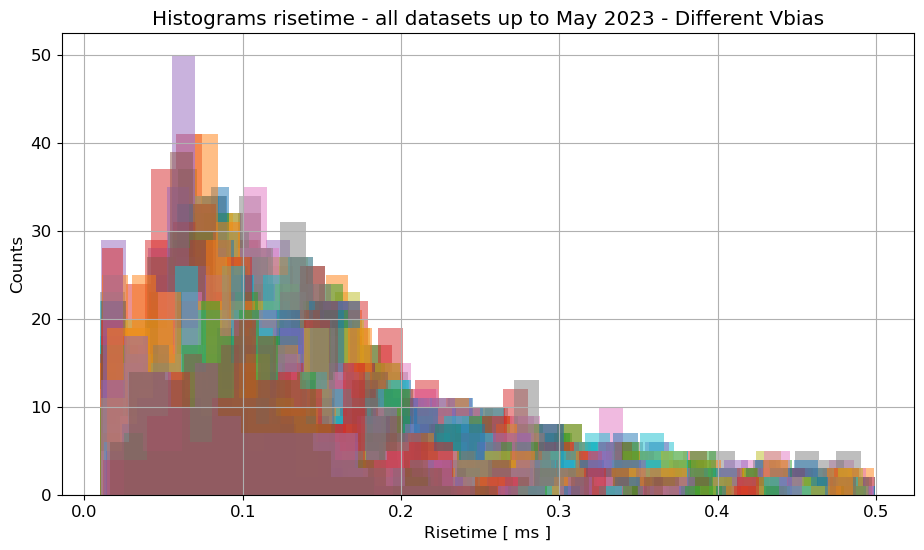

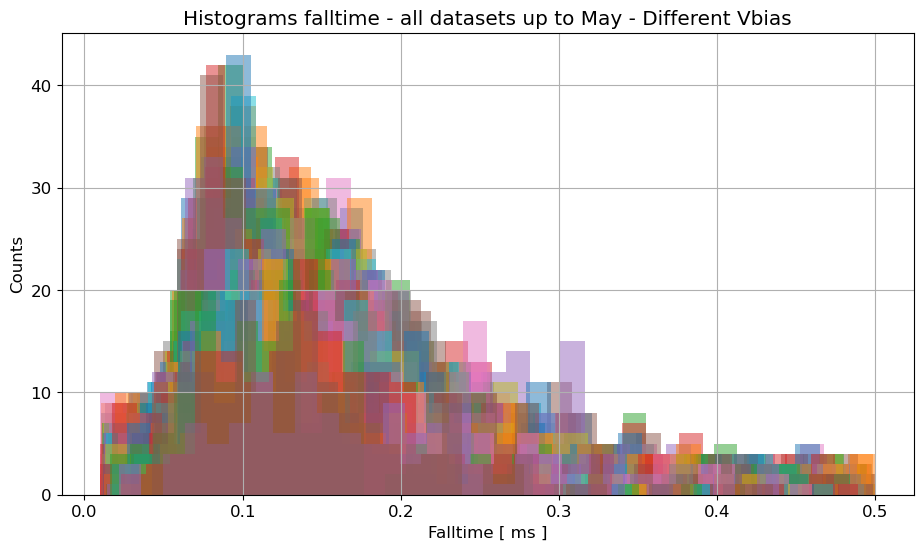

In [5]:
figure()
title('Histograms risetime - all datasets up to May 2023 - Different Vbias')
ylabel('Counts')
xlabel('Risetime [ ms ]')

rt_mean = np.zeros(len(thedicts))
rt_mean_error = np.zeros(len(thedicts))
ft_mean = np.zeros(len(thedicts))
ft_mean_error = np.zeros(len(thedicts))
Vbias = np.zeros(len(thedicts))
ok = np.zeros((len(thedicts),256),dtype=bool)
rt = np.zeros((len(thedicts),256))
ft = np.zeros((len(thedicts),256))
rt_error = np.zeros((len(thedicts),256))
ft_error = np.zeros((len(thedicts),256))
amps = np.zeros((len(thedicts),256))
amps_error = np.zeros((len(thedicts),256))

rt_mincut = 0.01
ft_mincut = 0.01
rt_maxcut = .5
ft_maxcut = .5

for i in np.arange(len(thedicts)):
    ok_cuts_rt = (alldic['{}'.format(i+1)]['alltod_folded_nonorm']['risetime']>rt_mincut)&(alldic['{}'.format(i+1)]['alltod_folded_nonorm']['risetime']<rt_maxcut)
    ok_cuts_ft = (alldic['{}'.format(i+1)]['alltod_folded_nonorm']['falltime']>ft_mincut)&(alldic['{}'.format(i+1)]['alltod_folded_nonorm']['falltime']<ft_maxcut)
    ok_cuts = ok_cuts_ft * ok_cuts_rt
    ok[i,:] = ok_cuts * alldic['{}'.format(i+1)]['ok']['Residuals_combined'] * alldic['{}'.format(i+1)]['ok']['Saturation']
    rt[i,:] = alldic['{}'.format(i+1)]['alltod_folded_nonorm']['risetime']
    rt_error[i,:] = alldic['{}'.format(i+1)]['alltod_folded_nonorm']['risetime_error']
    ft[i,:] = alldic['{}'.format(i+1)]['alltod_folded_nonorm']['falltime']
    ft_error[i,:] = alldic['{}'.format(i+1)]['alltod_folded_nonorm']['falltime_error']
    amps[i,:] = alldic['{}'.format(i+1)]['alltod_folded_nonorm']['amplitude']
    amps_error[i,:] = alldic['{}'.format(i+1)]['alltod_folded_nonorm']['amplitude_error']
    Vbias[i] = alldic['{}'.format(i+1)]['Vbias']
    rt_mean[i] = np.mean(alldic['{}'.format(i+1)]['alltod_folded_nonorm']['risetime'][ok[i,:]])
    rt_mean_error[i] = np.sum(alldic['{}'.format(i+1)]['alltod_folded_nonorm']['risetime_error'][ok[i,:]])/(np.sum(ok[i,:]))
    ft_mean[i] = np.mean(alldic['{}'.format(i+1)]['alltod_folded_nonorm']['falltime'][ok[i,:]])
    ft_mean_error[i] = np.sum(alldic['{}'.format(i+1)]['alltod_folded_nonorm']['falltime_error'][ok[i,:]])/(np.sum(ok[i,:]))
    hist(alldic['{}'.format(i+1)]['alltod_folded_nonorm']['risetime'][ok[i]],30,alpha=0.5)#,label='Vbias {:.1f}'.format(Vbias[i]))

grid()
# legend()
tight_layout

figure()
title('Histograms falltime - all datasets up to May - Different Vbias')
ylabel('Counts')
xlabel('Falltime [ ms ]')

for i in np.arange(len(thedicts)):
    hist(ft[i,ok[i]],30,alpha=0.5)

grid()
# legend()

tight_layout

### Time constant analysis TES by TES for all the datasets

Here we study the time constant value for each TES depending on the signal amplitude and the bias voltage for all the good measurements. 

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

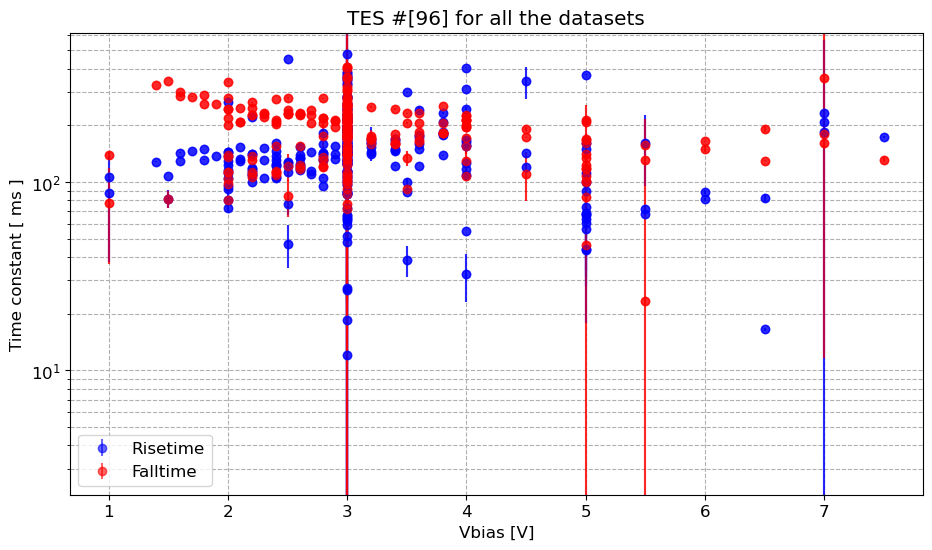

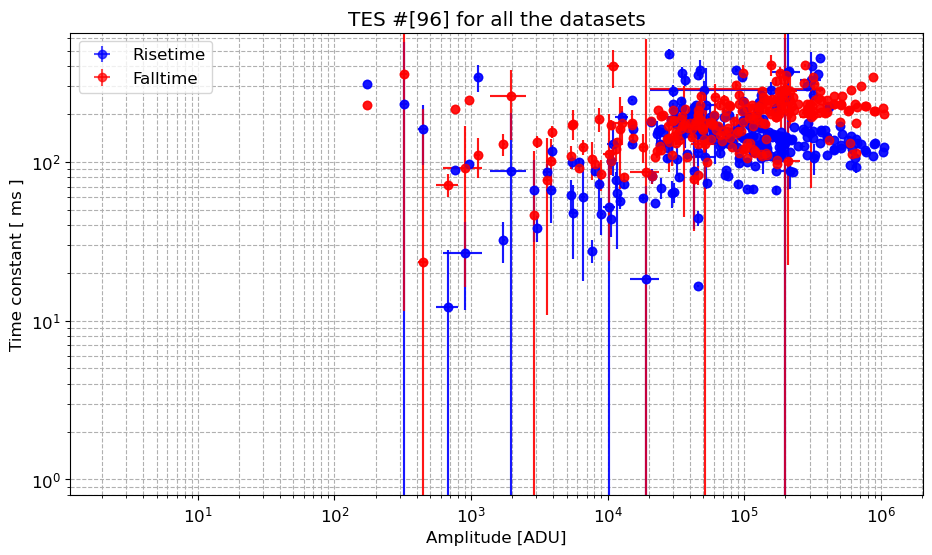

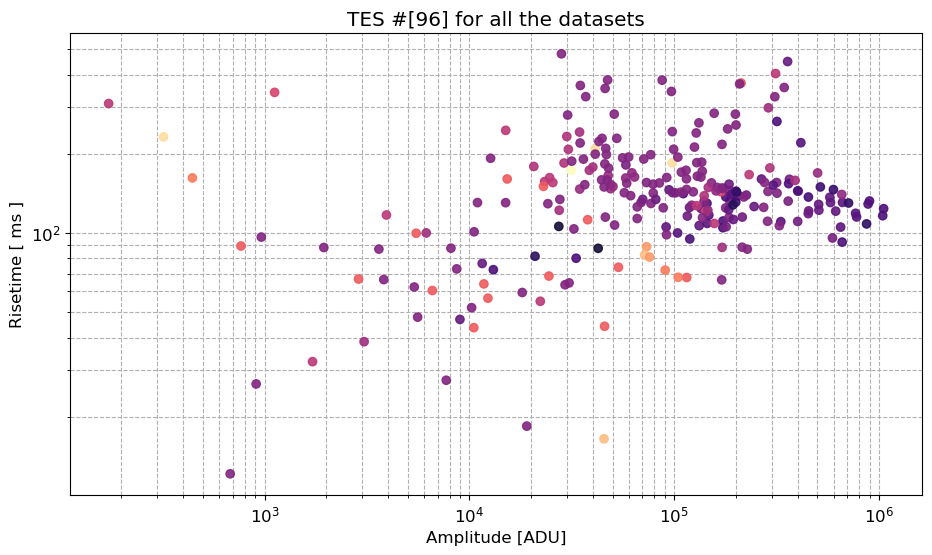

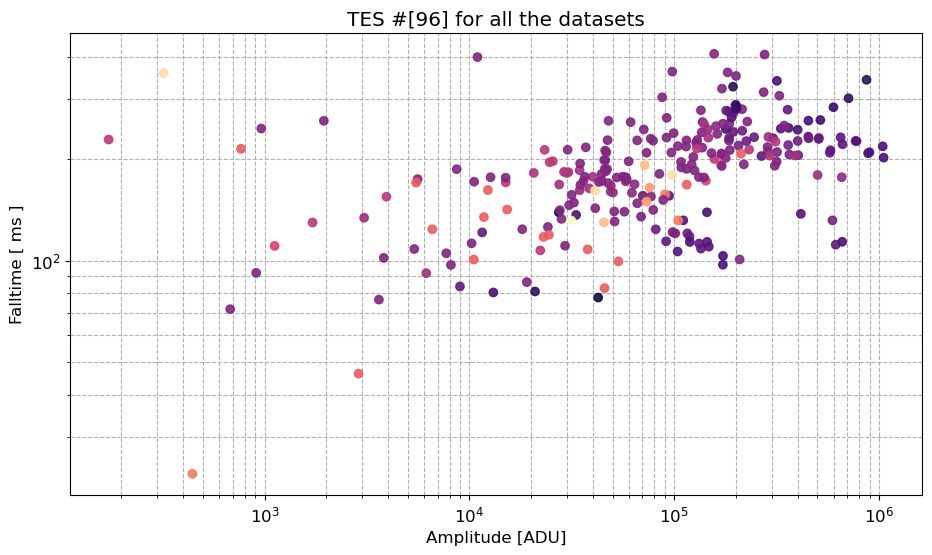

In [7]:
ok_fortes = np.transpose(ok)

# tesnum = 21

# tes_to_plot = [21,96,95,203]

tes_to_plot = [96]

figure()

ax = axes()
ax.set_axisbelow(True)
ax.set_title('TES #{} for all the datasets'.format(tes_to_plot))
ax.set_ylabel('Time constant [ ms ]')
ax.set_xlabel('Vbias [V]')
ax.set_yscale("log")

# for tesnum in np.arange(1,257):
#     ax.errorbar(Vbias[ok_fortes[tesnum-1]],1e3*rt[ok_fortes[tesnum-1],tesnum-1],yerr = 1e3*rt_error[ok_fortes[tesnum-1],tesnum-1],fmt='bo',alpha=0.6)#,label='Risetime')
#     ax.errorbar(Vbias[ok_fortes[tesnum-1]],1e3*ft[ok_fortes[tesnum-1],tesnum-1],yerr = 1e3*ft_error[ok_fortes[tesnum-1],tesnum-1],fmt='ro',alpha=0.6)#,label='Falltime')
for i,tesnum in enumerate(tes_to_plot):
    if i == 0:        
        ax.errorbar(Vbias[ok_fortes[tesnum-1]],1e3*rt[ok_fortes[tesnum-1],tesnum-1],yerr = 1e3*rt_error[ok_fortes[tesnum-1],tesnum-1],fmt='bo',alpha=0.6,label='Risetime')
        ax.errorbar(Vbias[ok_fortes[tesnum-1]],1e3*ft[ok_fortes[tesnum-1],tesnum-1],yerr = 1e3*ft_error[ok_fortes[tesnum-1],tesnum-1],fmt='ro',alpha=0.6,label='Falltime')

    ax.errorbar(Vbias[ok_fortes[tesnum-1]],1e3*rt[ok_fortes[tesnum-1],tesnum-1],yerr = 1e3*rt_error[ok_fortes[tesnum-1],tesnum-1],fmt='bo',alpha=0.6)
    ax.errorbar(Vbias[ok_fortes[tesnum-1]],1e3*ft[ok_fortes[tesnum-1],tesnum-1],yerr = 1e3*ft_error[ok_fortes[tesnum-1],tesnum-1],fmt='ro',alpha=0.6)

        
grid(which='both',linestyle='--')
legend()
tight_layout

figure()

ax = axes()
ax.set_axisbelow(True)
ax.set_title('TES #{} for all the datasets'.format(tes_to_plot))
ax.set_ylabel('Time constant [ ms ]')
ax.set_xlabel('Amplitude [ADU]')
ax.set_xscale("log")
ax.set_yscale("log")
for i, tesnum in enumerate(tes_to_plot):
    if i == 0:
        ax.errorbar(np.abs(amps[ok_fortes[tesnum-1],tesnum-1]),1e3*rt[ok_fortes[tesnum-1],tesnum-1],yerr = 1e3*rt_error[ok_fortes[tesnum-1],tesnum-1], xerr = amps_error[ok_fortes[tesnum-1],tesnum-1],fmt='bo',alpha=0.7,label='Risetime')
        ax.errorbar(np.abs(amps[ok_fortes[tesnum-1],tesnum-1]),1e3*ft[ok_fortes[tesnum-1],tesnum-1],yerr = 1e3*ft_error[ok_fortes[tesnum-1],tesnum-1], xerr = amps_error[ok_fortes[tesnum-1],tesnum-1],fmt='ro',alpha=0.7,label='Falltime')

    ax.errorbar(np.abs(amps[ok_fortes[tesnum-1],tesnum-1]),1e3*rt[ok_fortes[tesnum-1],tesnum-1],yerr = 1e3*rt_error[ok_fortes[tesnum-1],tesnum-1], xerr = amps_error[ok_fortes[tesnum-1],tesnum-1],fmt='bo',alpha=0.7)
    ax.errorbar(np.abs(amps[ok_fortes[tesnum-1],tesnum-1]),1e3*ft[ok_fortes[tesnum-1],tesnum-1],yerr = 1e3*ft_error[ok_fortes[tesnum-1],tesnum-1], xerr = amps_error[ok_fortes[tesnum-1],tesnum-1],fmt='ro',alpha=0.7)

grid(which='both',linestyle='--')
legend()
tight_layout

cmap = plt.colormaps['magma']

figure()

ax = axes()
ax.set_axisbelow(True)
ax.set_title('TES #{} for all the datasets'.format(tes_to_plot))
ax.set_ylabel('Risetime [ ms ]')
ax.set_xlabel('Amplitude [ADU]')
ax.set_xscale("log")
ax.set_yscale("log")
grid(which='both',linestyle='--')
for tesnum in tes_to_plot:
    colors = cmap(0.1+0.9*(Vbias[ok_fortes[tesnum-1]]-np.min(Vbias[ok_fortes[tesnum-1]]))/(np.max(Vbias[ok_fortes[tesnum-1]])-np.min(Vbias[ok_fortes[tesnum-1]])))
    ax.scatter(np.abs(amps[ok_fortes[tesnum-1],tesnum-1]),1e3*rt[ok_fortes[tesnum-1],tesnum-1],alpha=0.9,c=colors)#,label='Risetime')
    # ax.scatter(np.abs(amps[ok_fortes[tesnum-1],tesnum-1]),1e3*ft[ok_fortes[tesnum-1],tesnum-1],alpha=0.9,c=colors)#,label='Falltime')

# legend()
tight_layout

figure()

ax = axes()
ax.set_axisbelow(True)
ax.set_title('TES #{} for all the datasets'.format(tes_to_plot))
ax.set_ylabel('Falltime [ ms ]')
ax.set_xlabel('Amplitude [ADU]')
ax.set_xscale("log")
ax.set_yscale("log")
grid(which='both',linestyle='--')
for tesnum in tes_to_plot:
    colors = cmap(0.1+0.9*(Vbias[ok_fortes[tesnum-1]]-np.min(Vbias[ok_fortes[tesnum-1]]))/(np.max(Vbias[ok_fortes[tesnum-1]])-np.min(Vbias[ok_fortes[tesnum-1]])))
    # ax.scatter(np.abs(amps[ok_fortes[tesnum-1],tesnum-1]),1e3*rt[ok_fortes[tesnum-1],tesnum-1],alpha=0.9,c=colors)#,label='Risetime')
    ax.scatter(np.abs(amps[ok_fortes[tesnum-1],tesnum-1]),1e3*ft[ok_fortes[tesnum-1],tesnum-1],alpha=0.9,c=colors)#,label='Falltime')

# legend()
tight_layout

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

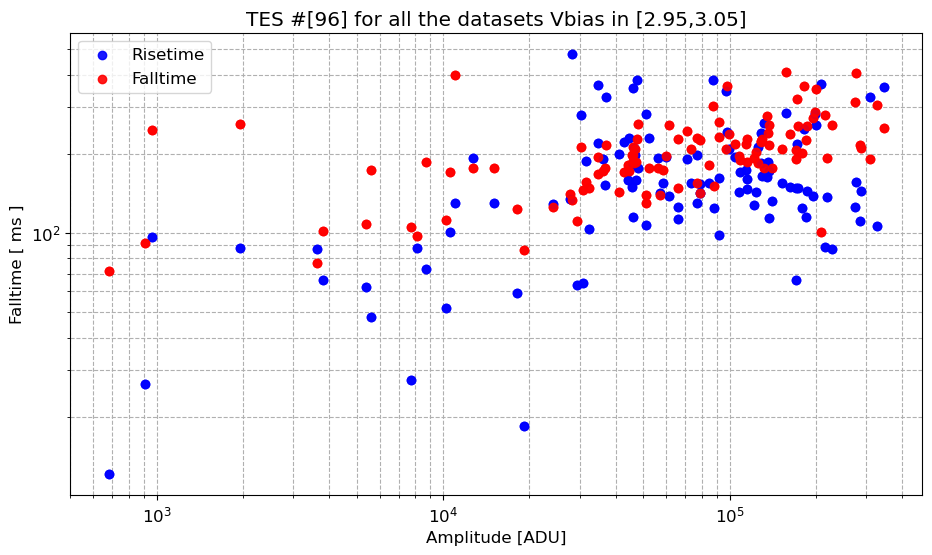

In [14]:
figure()

tes_to_plot = [96]
Vbias_selected = 3
delta_Vbias = 0.05

ax = axes()
ax.set_axisbelow(True)

ax.set_ylabel('Falltime [ ms ]')
ax.set_xlabel('Amplitude [ADU]')
ax.set_xscale("log")
ax.set_yscale("log")
grid(which='both',linestyle='--')


for i,tesnum in enumerate(tes_to_plot):
    ok_array_Vbias = (Vbias[ok_fortes[tesnum-1]] > Vbias_selected - delta_Vbias) * (Vbias[ok_fortes[tesnum-1]] < Vbias_selected + delta_Vbias)
    if i == 0:
            ax.scatter(np.abs(amps[ok_fortes[tesnum-1],tesnum-1][ok_array_Vbias]),1e3*rt[ok_fortes[tesnum-1],tesnum-1][ok_array_Vbias],alpha=0.9,color='blue',label='Risetime')
            ax.scatter(np.abs(amps[ok_fortes[tesnum-1],tesnum-1][ok_array_Vbias]),1e3*ft[ok_fortes[tesnum-1],tesnum-1][ok_array_Vbias],alpha=0.9,color='red',label='Falltime') 

    ax.scatter(np.abs(amps[ok_fortes[tesnum-1],tesnum-1][ok_array_Vbias]),1e3*rt[ok_fortes[tesnum-1],tesnum-1][ok_array_Vbias],alpha=0.9,color='blue')
    ax.scatter(np.abs(amps[ok_fortes[tesnum-1],tesnum-1][ok_array_Vbias]),1e3*ft[ok_fortes[tesnum-1],tesnum-1][ok_array_Vbias],alpha=0.9,color='red')

ax.set_title(f'TES #{tes_to_plot} for all the datasets Vbias in [{Vbias_selected - delta_Vbias},{Vbias_selected + delta_Vbias}]')
legend()
tight_layout

In [ ]:

# ##rt vs amplitude for several Vbias

# rt_nonorm = alldic['1']['alltod_folded_nonorm']['risetime']
# rt_norm = alldic['1']['alltod_folded_norm']['risetime']
# b = np.abs(rt_nonorm-rt_norm)

# # figure()
# # plot(b,'.')


# results = np.array([b]).T
# labels = tct.run_DBSCAN(results, doplot=True, parnames = ['Risetime diff'],eps_cpar=0.01,min_samples_cpar = 10)

In [ ]:
# # print(alldic['1'])#['alltod_folded_nonorm']['amplitude'])
# amps_1 = np.abs(alldic['1']['alltod_folded_nonorm']['amplitude'])
# ok = alldic['1']['ok']['Residuals'] & (amps_1<20000) & (amps_1>0)

# figure()
# hist(amps_1[ok],15)

In [ ]:
# figure()
# plot(d['alltod_folded_norm']['residuals_fit_folded_median'],d['alltod_folded_norm']['residuals_folded_median'],'.')
# plot(d['alltod_folded_norm']['residuals_fit_folded_median'],d['alltod_folded_norm']['residuals_fit_folded_median'])
# # show()

In [ ]:
# print(d['dataset_info'])
# print(d['Vbias'])